In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
iris = datasets.load_iris()

In [3]:
print(type(iris))

<class 'sklearn.utils._bunch.Bunch'>


In [4]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
iris.data.shape

(150, 4)

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
x = iris.data
y = iris.target
iris_df = pd.DataFrame(x, columns=iris.feature_names)
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


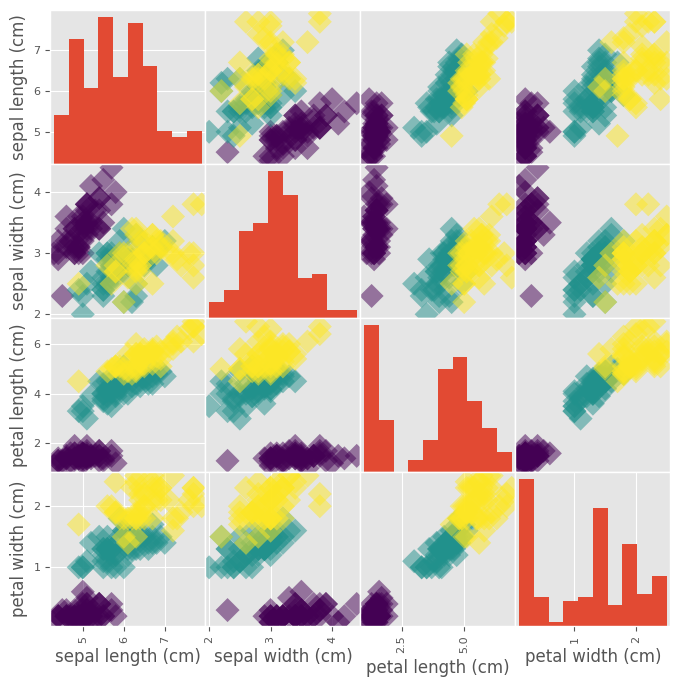

In [8]:
_ = pd.plotting.scatter_matrix(iris_df, c=y, figsize=[8,8], s=150, marker='D')
plt.show()

In [9]:
validation_size = 0.20
seed = 7
from sklearn import model_selection
x_train, x_validation, y_train, y_validation = model_selection.train_test_split(x, y, test_size=validation_size, random_state=seed)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


seed = 7
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

c:\Users\muhamad agus faisal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR: 0.983333 (0.033333)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.950000 (0.076376)
NB: 0.966667 (0.040825)
SVM: 0.983333 (0.033333)


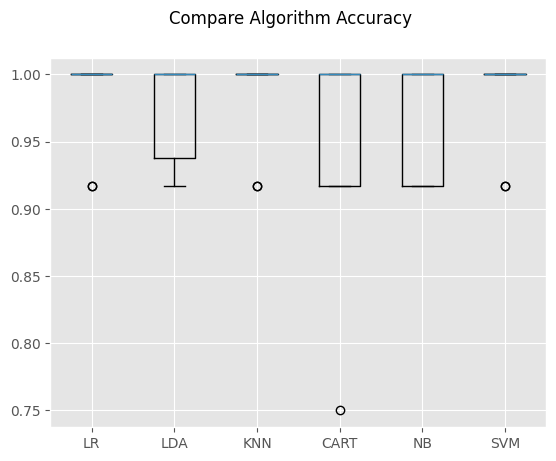

In [11]:
fig = plt.figure()
fig.suptitle('Compare Algorithm Accuracy')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [12]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [13]:
svm = SVC()
svm.fit(x_train, y_train)
predictions = svm.predict(x_validation)
print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.8666666666666667
[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.83      0.83      0.83        12
           2       0.82      0.82      0.82        11

    accuracy                           0.87        30
   macro avg       0.88      0.88      0.88        30
weighted avg       0.87      0.87      0.87        30



In [14]:
# save the model to disk
import pickle
filename = 'finalized_model.sav'
pickle.dump(svm, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_validation, y_validation)
result

0.8666666666666667

In [15]:
gapminder_df = pd.read_csv('dataset/gm_2008_region.csv')
gapminder_df

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific
...,...,...,...,...,...,...,...,...,...,...
134,3350832.0,2.11,0.5,2.489764,26.39123,15317.0,124.2604,76.0,13.0,America
135,26952719.0,2.46,0.1,4.476669,25.32054,3733.0,124.3462,68.7,49.2,Europe & Central Asia
136,86589342.0,1.86,0.4,1.479347,20.91630,4085.0,121.9367,75.4,26.2,East Asia & Pacific
137,13114579.0,5.88,13.6,0.148982,20.68321,3039.0,132.4493,52.0,94.9,Sub-Saharan Africa


In [16]:
gapminder_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   population       139 non-null    float64
 1   fertility        139 non-null    float64
 2   HIV              139 non-null    float64
 3   CO2              139 non-null    float64
 4   BMI_male         139 non-null    float64
 5   GDP              139 non-null    float64
 6   BMI_female       139 non-null    float64
 7   life             139 non-null    float64
 8   child_mortality  139 non-null    float64
 9   Region           139 non-null    object 
dtypes: float64(9), object(1)
memory usage: 11.0+ KB


In [17]:
# Create arrays for features and target variable
y = gapminder_df['life'].values
x = gapminder_df['fertility'].values

In [18]:
# Print the dimensions of x and y before reshaping
print("Dimensions of target variable before reshaping: {}".format(y.shape))
print("Dimensions of feature variable before reshaping: {}".format(x.shape))

Dimensions of target variable before reshaping: (139,)
Dimensions of feature variable before reshaping: (139,)


In [19]:
# Reshape x and y
y = y.reshape(-1, 1)
x = x.reshape(-1, 1)
# Print the dimensions of x and y after reshaping
print("Dimensions of target after reshaping: {}".format(y.shape))
print("Dimensions of features variable after reshaping: {}".format(x.shape))

Dimensions of target after reshaping: (139, 1)
Dimensions of features variable after reshaping: (139, 1)


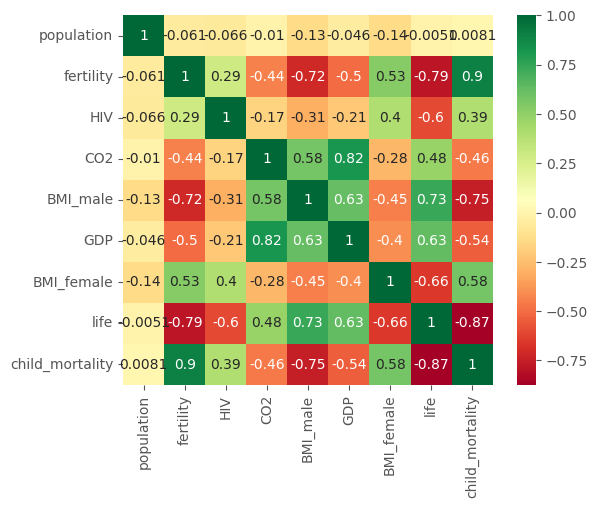

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (pastikan sudah memuat gapminder_df sebelumnya)
gapminder_numeric = gapminder_df.drop(columns=['Region'])  # Drop the 'Region' column
corr_matrix = gapminder_numeric.corr()  # Compute correlation matrix

# Plot heatmap
sns.heatmap(corr_matrix, square=True, cmap='RdYlGn', annot=True)
plt.show()

0.6192442167740035


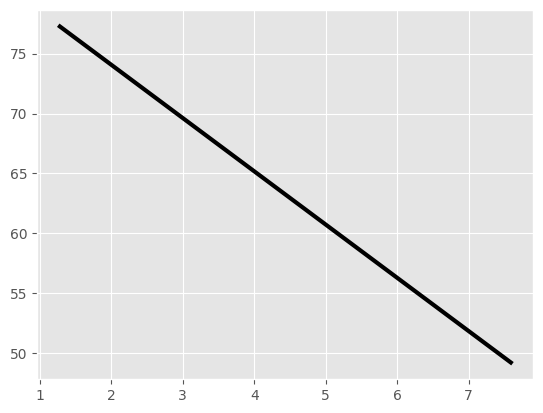

In [21]:
# Import LinearRegression 
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
predictions_space = np.linspace(min(x), max(x)).reshape(-1, 1)

# Fit the model to the data
reg.fit(x, y)

# Compute preductions over the prediction space: y_pred
y_pred = reg.predict(predictions_space)

# Print R^2
print(reg.score(x, y))

# Plot regression line
plt.plot(predictions_space, y_pred, color='black', linewidth=3)
plt.show()

In [22]:
# Import necassary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(x_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(x_test)

# Compute and pring R^2 and RMSE
print("R^2: {}".format(reg_all.score(x_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.7298987360907494
Root Mean Squared Error: 4.194027914110243


In [23]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores
cv_scores = cross_val_score(reg, x, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

# Print the avarage 5-fold cross-validation score
print("Avarage 5-fold CV Score: {}".format(np.mean(cv_scores)))



[0.71001079 0.75007717 0.55271526 0.547501   0.52410561]
Avarage 5-fold CV Score: 0.6168819644425119


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
(569, 30)
Training score:  0.5600974529893081
Testing score:  0.5832244618818156
Number of features used:  4


C:\Users\muhamad agus faisal\AppData\Local\Temp\ipykernel_15076\1123746741.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=13, loc=4)


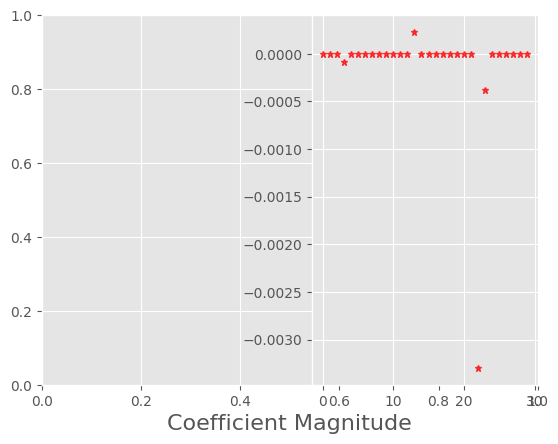

In [24]:
from sklearn.linear_model import Lasso
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.keys())
print(cancer.data.shape)
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
x = cancer.data
y = cancer.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=31)
lasso = Lasso()
lasso.fit(x_train, y_train)
train_score = lasso.score(x_train, y_train)
test_score = lasso.score(x_test, y_test)
coeff_used = np.sum(lasso.coef_!=0)
print("Training score: ", train_score)
print("Testing score: ", test_score)
print("Number of features used: ", coeff_used)
plt.xlabel("Coefficient Index", fontsize=16)
plt.xlabel("Coefficient Magnitude", fontsize=16)
plt.legend(fontsize=13, loc=4)
plt.subplot(1,2,2)
plt.plot(lasso.coef_, alpha=0.7, linestyle='none', marker='*', markersize=5, color='red', label=r'Lasso: $\alpha = 1$', zorder=7)
plt.show()


In [25]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import Ridge
import pandas as pd

# Memuat dataset California Housing
california = fetch_california_housing()

# Membuat DataFrame
california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df["Price"] = california.target

# Memisahkan fitur dan target
new_x = california_df.drop("Price", axis=1)
new_y = california_df["Price"]

print(california_df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


6192 6192
Linear regression trian score:  0.6096935309447493
Linear regression test score:  0.6096935309447493
Ridge regression train score low alpha:  0.6096935309343097
Ridge regression test score low alpha:  0.5910073521875898


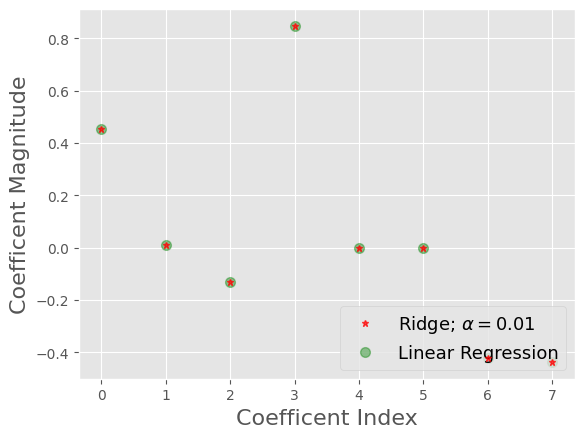

In [26]:
x_train, x_test, y_train, y_test = train_test_split(new_x, new_y, test_size=0.3, random_state=3)
print(len(x_test), len(y_test))
lr = LinearRegression()
lr.fit(x_train, y_train)
rr = Ridge(alpha=0.01)
rr.fit(x_train, y_train)
train_score = lr.score(x_train, y_train)
test_score = lr.score(x_test, y_test)
ridge_train_score = rr.score(x_train, y_train)
ridge_test_score = rr.score(x_test, y_test)
print("Linear regression trian score: ", train_score)
print("Linear regression test score: ", train_score)
print("Ridge regression train score low alpha: ", ridge_train_score)
print("Ridge regression test score low alpha: ", ridge_test_score)
plt.plot(rr.coef_,alpha=0.7, linestyle='none', marker='*', markersize=5, color='red', label=r'Ridge; $\alpha=0.01$', zorder=7)
plt.plot(lr.coef_,alpha=0.4, linestyle='none', marker='o', markersize=7, color="green", label='Linear Regression')
plt.xlabel("Coefficent Index", fontsize=16)
plt.ylabel("Coefficent Magnitude", fontsize=16)
plt.legend(fontsize=13, loc=4)
plt.show()

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Memuat dataset
df = pd.read_csv('dataset/diabetes.csv')

# Pisahkan fitur dan target
y = df['Outcome']
x = df.drop('Outcome', axis=1)

# Scaling data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {"C": c_space}

# Logistic Regression
logreg = LogisticRegression(max_iter=1000, solver='saga')
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(x_scaled, y)

print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameters: {'C': 0.4393970560760795}
Best score is 0.7721840251252015


In [28]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ['gini', 'entropy']}

tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

tree_cv.fit(x, y)

print("Tuned Decision Tree Parameters: {}". format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 8, 'min_samples_leaf': 7}
Best score is 0.7291740938799762


In [29]:
# Handling categorical variable "Region" by binarizing it(creating dummy variables)
# Create dummy variables: df_region
df_region = pd.get_dummies(df)

# Print the columns of df_region
print(df_region.columns)

# Drop "Region_America" from df_region
df_region = pd.get_dummies(df, drop_first=True)

# Print the new columns of df_region
print(df_region.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# Normalisasi data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Ridge Regression tanpa argumen normalize
ridge = Ridge(alpha=0.5)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge, x_scaled, y, cv=5)

print("Cross-validated scores: ", ridge_cv)


Cross-validated scores:  [0.25695832 0.25756589 0.29072545 0.28109092 0.29410363]


In [31]:
df = pd.read_csv('dataset/pima-indians-diabetes.data.csv', header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    int64  
 2   2       768 non-null    int64  
 3   3       768 non-null    int64  
 4   4       768 non-null    int64  
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [32]:
missing_values_count = df.isnull().sum()
print("Count of missing values:\n", missing_values_count)

Count of missing values:
 0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64


In [33]:
df.describe()

,0,1,2,3,4,5,6,7,8
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [34]:
# Mark some columns zero values as missing on NaN
import numpy as np
df[[1, 2, 3, 4, 5]] = df[[1,2,3,4,5]].replace(0, np.NaN)
df.isnull().sum()

0      0
1      5
2     35
3    227
4    374
5     11
6      0
7      0
8      0
dtype: int64

In [35]:
from sklearn.impute import SimpleImputer
import numpy as np

# Fill missing values with mean column values
values = df.values
imputer = SimpleImputer(strategy='mean')  # Pilih strategi 'mean', 'median', atau 'most_frequent'
transformed_values = imputer.fit_transform(values)

# Count the number of NaN values in each column
print("Total NaN values:", np.isnan(transformed_values).sum())

Total NaN values: 0


In [36]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Definisikan model
model = LinearDiscriminantAnalysis()

# Definisikan KFold
kfold = KFold(n_splits=3, shuffle=True, random_state=7)

# Evaluasi model menggunakan cross-validation
result = cross_val_score(model, transformed_values, y, cv=kfold, scoring='accuracy')

# Cetak rata-rata skor
print("Mean Accuracy:", result.mean())


Mean Accuracy: 0.765625


In [37]:
from sklearn.impute import SimpleImputer  # Ganti Imputer dengan SimpleImputer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
import numpy as np  # Untuk menangani nilai NaN

# Instansiasi SimpleImputer dengan strategi 'most_frequent'
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# Instansiasi classifier SVM
clf = SVC()

# Setup pipeline dengan langkah-langkah yang diperlukan
steps = [('imputation', imp),
         ('SVM', clf)]

# Buat pipeline
pipeline = Pipeline(steps)

print("Pipeline successfully created.")


Pipeline successfully created.


In [38]:
from sklearn.impute import SimpleImputer  # Ganti Imputer dengan SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

# Contoh data
x = np.array([[np.nan, 2], [6, np.nan], [7, 6], [np.nan, 8], [5, 5]])
y = [1, 0, 1, 0, 1]

# Setup the pipeline steps: steps
steps = [('imputation', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
         ('SVM', SVC())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Fit the pipeline to the train set
pipeline.fit(x_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(x_test)

# Compute metrics
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



c:\Users\muhamad agus faisal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\muhamad agus faisal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\muhamad agus faisal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont